# DATA PRE PROCESSING

In the initial steps we carry out the data pre processing so as to have an accurate output. It includes various steps- Data Cleaning, Feature Extraction ,Data wrangling etc.

In [100]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data=pd.read_csv("sales.csv",encoding = "ISO-8859-1") #converting data to encoded ISO-8859-1 format from utf-8
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [6]:
data.shape

(2823, 25)

In [12]:
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

# DATA ANALYSIS

For analysing, we need to obtain the visualization of our data distribution of numeric data

In [26]:
summary=data.describe()
summary=summary.transpose()
summary.head()

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2823.0,149.972016,86.997391,0.0,76.0,151.0,221.5,306.0
QUANTITYORDERED,2823.0,24.041091,9.505328,0.0,16.0,24.0,32.0,57.0
PRICEEACH,2823.0,742.386468,331.616658,0.0,471.5,943.0,1015.0,1015.0
ORDERLINENUMBER,2823.0,5.466171,4.225841,0.0,2.0,5.0,8.0,17.0
SALES,2823.0,1380.616011,796.664474,0.0,693.5,1378.0,2070.0,2762.0


To decide which attributes have to be used for our algorithm, we need to visualize them.

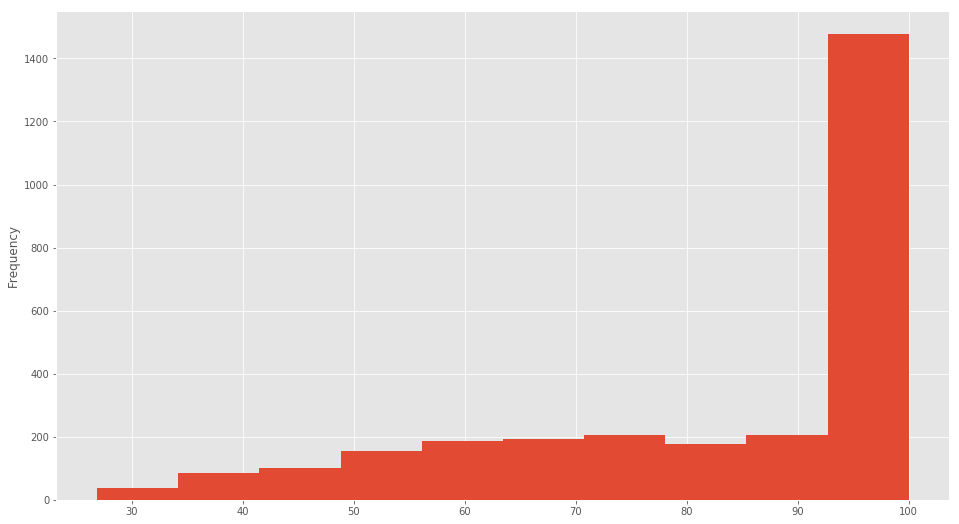

In [101]:
data["PRICEEACH"].plot.hist()

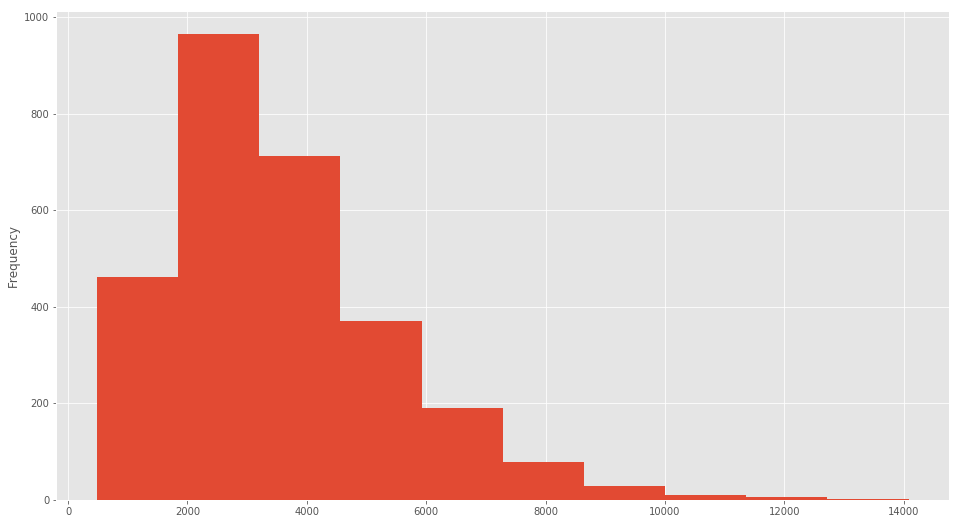

In [102]:
data["SALES"].plot.hist()

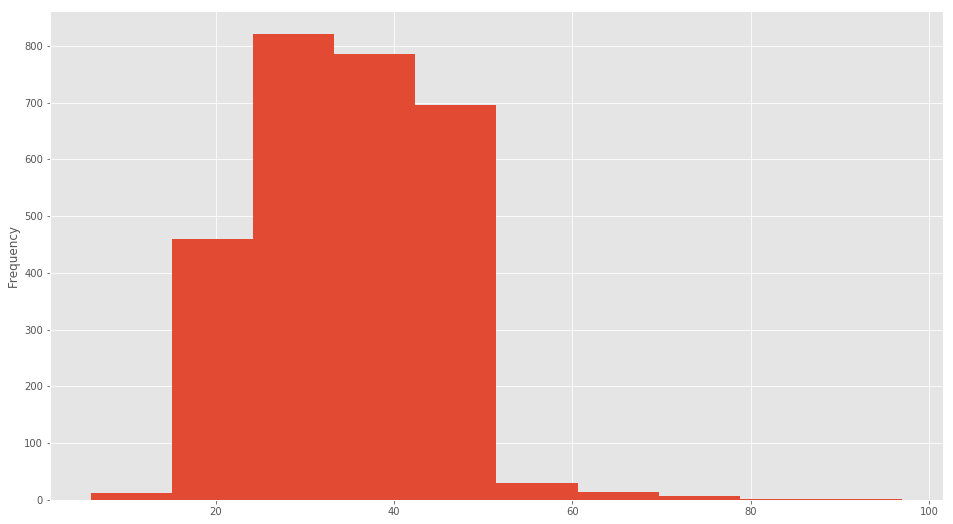

In [103]:
data["QUANTITYORDERED"].plot.hist()

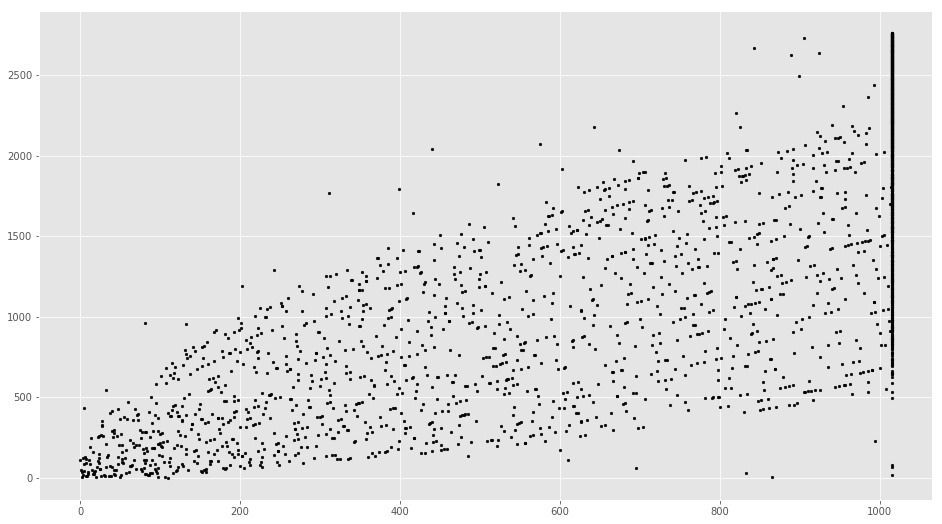

In [96]:
x=data.iloc[:,[2,4]].values

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.scatter(x[:,0],x[:,1], c='black', s=7)

In [104]:
from scipy import stats
x=x[(np.abs(stats.zscore(x)) < 3).all(axis=1)]

In [105]:
x.shape

(2593, 2)

# K-MEANS IMPLEMENTATION

Centroids are: [[1015 1285]
 [ 653 1606]]
Iteration 1 :
New Centroid for cluster 1: [355. 632.]
New Centroid for cluster 2: [ 418. 1305.]
Iteration 2 :
New Centroid for cluster 1: [355. 632.]
New Centroid for cluster 2: [ 418. 1305.]
Same centroids again!


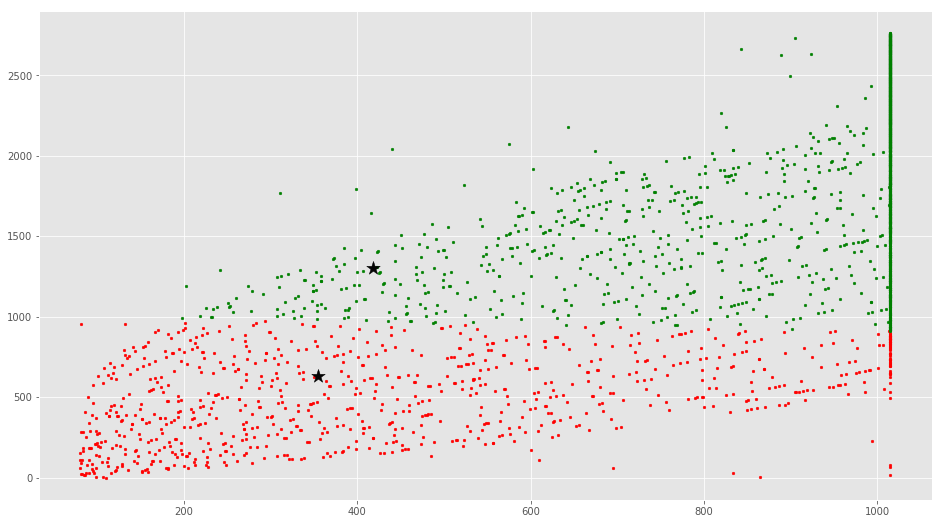

In [99]:

import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt

def euclidean(a,b):
	return np.linalg.norm(a-b)

def main():
    #Step 1: Choosing random value of k centroids from the values present in dataset
    #2d array with 2 centroids from x randomly,k=2
    centroid=x[np.random.choice(x.shape[0],2, replace=False)]
    
    print("Centroids are:",centroid)
    
    total=x.shape
    distance_1=np.zeros(total[0])
    distance_2=np.zeros(total[0])
    belongs_to=np.zeros(total[0])
    c_old=np.zeros(centroid.shape)
    error=euclidean(centroid,c_old)
    mean=np.zeros(centroid.shape)
    iterator=0
    
    #Step 2: Calculate euclidean distance for each point with each centroid 
    while error!=0:
        print("Iteration",iterator+1,":")
        for i in range(total[0]):
            distance_1[i]=euclidean(x[i],centroid[0])
            #print("Distance of point",x[i],"with centroid 1:",distance_1[i])
            distance_2[i]=euclidean(x[i],centroid[1])
            #print("Distance of point",x[i],"with centroid 2:",distance_2[i])
            
            #Step 3: Comparing the distances and assigning clusters
            if (distance_1[i]<distance_2[i]):
                belongs_to[i]=0
                #print("Point",x[i]," is in cluster 1.")
            if (distance_1[i]>distance_2[i]):
                belongs_to[i]=1
                #print("Point",x[i]," is in cluster 2.")
                
        #Step 4: Taking mean and repeat
        c_old=deepcopy(centroid)
        for i in range(len(belongs_to)):
            if belongs_to[i]==0:
                mean[0][0]=np.mean(x[i][0])
                mean[0][1]=np.mean(x[i][1])
            else:
                continue
        
        print("New Centroid for cluster 1:",mean[0])
        
        for i in range(len(belongs_to)):
            if belongs_to[i]==1:
                mean[1][0]=np.mean(x[i][0])
                mean[1][1]=np.mean(x[i][1])
            else:
                continue
        
        print("New Centroid for cluster 2:",mean[1])
        
        centroid[0]=mean[0]
        centroid[1]=mean[1]
        error=euclidean(centroid,c_old)
        iterator+=1
        if error==0:
            print("Same centroids again!")
    
    #plot the clustered points
    plt.rcParams['figure.figsize'] = (16, 9)
    plt.style.use('ggplot')
    colors = ['r', 'g']
    fig, ax = plt.subplots()
    for i in range(2):
        points = np.array([x[j] for j in range(len(x)) if belongs_to[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(centroid[:, 0], centroid[:, 1], marker='*', s=200, c='#050505')
    
if __name__=="__main__":
    main()